<a href="https://colab.research.google.com/github/srivennela-128/OIB-SIP/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install extras (run once)
!pip install -q imbalanced-learn xgboost lightgbm shap


In [ ]:
# If using google.colab.files to upload in a session (one-off)
from google.colab import files
uploaded = files.upload()  # choose creditcard.csv


Saving creditcard.csv to creditcard.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
0
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.5985

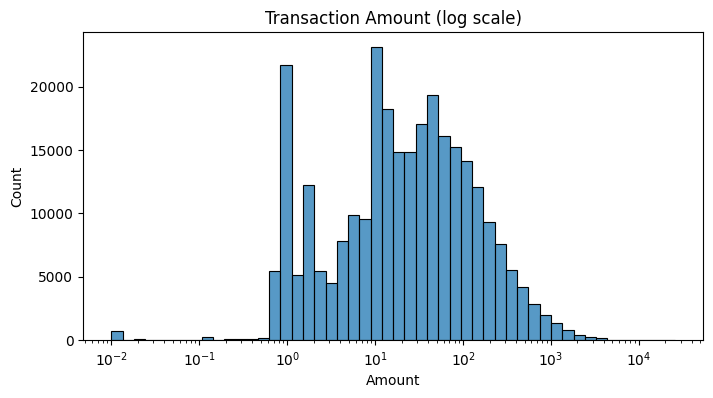

In [ ]:
import numpy as np
import pandas as pd

SEED = 42

# basics
print(df.shape)
print(df.dtypes)
print(df.isnull().sum().sum())  # dataset has no nulls usually

# class balance
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

# summary stats
print(df.describe().T)

# examine time and amount distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, log_scale=True)
plt.title('Transaction Amount (log scale)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Class'])
y = df['Class']

# train/test split stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y)

num_cols = ['Amount', 'Time']
# leave V1..V28 as numeric no scaling required if you prefer, but scaling is safe
pca_cols = [c for c in X.columns if c.startswith('V')]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('pca', 'passthrough', pca_cols),
])


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=SEED)
clf = LogisticRegression(max_iter=1000, class_weight=None, random_state=SEED)

pipeline = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', smote),
    ('clf', clf),
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount', 'Time']),
                                                 ('pca', 'passthrough',
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED)
pipe2 = Pipeline([('pre', preprocessor), ('rf', rf)])
pipe2.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount', 'Time']),
                                                 ('pca', 'passthrough',
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
# Cell 1: imports & seed
import numpy as np
import joblib
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
SEED = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)


In [ ]:
# Cell 2: fit preprocessor once (expensive step done only once)
# NOTE: preprocessor should be a sklearn ColumnTransformer or pipeline you defined earlier.
preprocessor.fit(X_train)            # fits scalers etc. to training set


ColumnTransformer(transformers=[('num', StandardScaler(), ['Amount', 'Time']),
                                ('pca', 'passthrough',
                                 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                  'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                  'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                  'V27', 'V28'])])

In [ ]:
# Cell 3: transform data once (faster than transforming inside every CV fold)
X_train_trans = preprocessor.transform(X_train)
X_test_trans  = preprocessor.transform(X_test)
# If preprocessor.transform returns a numpy array, X_train_trans will be array (ok for scikit-learn)


In [ ]:
# Cell 4: define the RandomForest estimator and param distribution
rf = RandomForestClassifier(class_weight='balanced', random_state=SEED, n_jobs=1)  # n_jobs=1 avoids nested parallelism

param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
# Quick fix: much smaller search budget
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

cv_fast = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

param_dist_fast = {
    'n_estimators': [50, 100],   # smaller trees during tuning
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rs_fast = RandomizedSearchCV(
    rf,                        # rf defined earlier (n_jobs=1 recommended)
    param_distributions=param_dist_fast,
    n_iter=4,                  # very small number of trials
    scoring='f1',
    cv=cv_fast,
    n_jobs=-1,                 # parallelize trials across cores
    random_state=SEED,
    verbose=2
)
rs_fast.fit(X_train_trans, y_train)
print("Best params (fast):", rs_fast.best_params_)
best_rf = rs_fast.best_estimator_


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params (fast): {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}


In [ ]:
# If you already wrapped best_rf in a pipeline in previous cell, skip this.
from sklearn.pipeline import Pipeline
best_pipeline = Pipeline([('pre', preprocessor), ('rf', best_rf)])
# Fit on the training set (if best_rf was fit on transformed data, refit on full training set)
# If best_rf was already fit (rs.fit was called on X_train_trans), you can still call:
best_pipeline.fit(X_train, y_train)  # will re-fit rf on full training data


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount', 'Time']),
                                                 ('pca', 'passthrough',
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, n_jobs=1,
                                        random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix
import numpy as np

y_proba = best_pipeline.predict_proba(X_test)[:, 1]
y_pred = best_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))
print("PR AUC (avg precision): {:.4f}".format(average_precision_score(y_test, y_proba)))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9483
PR AUC (avg precision): 0.8490
Confusion matrix:
 [[56861     3]
 [   24    74]]


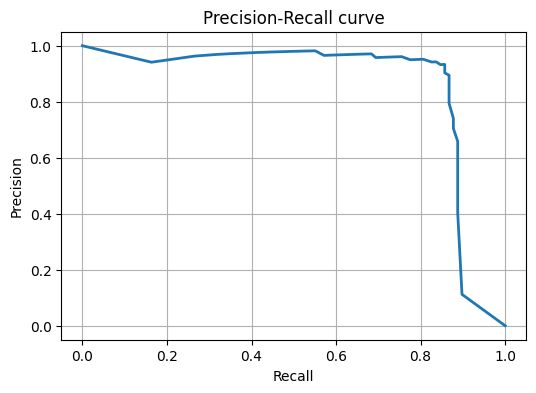

Chosen threshold for precision >= 0.9: 1.0000 (recall = 0.0000)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)
plt.show()

# Example: select threshold that gives precision >= 0.90 (if exists)
import numpy as np
desired_prec = 0.90
idx = np.where(precision >= desired_prec)[0]
if len(idx) > 0:
    # choose the threshold with highest recall among those with precision >= desired_prec
    chosen_idx = idx[-1]  # last one has highest recall at that precision
    chosen_threshold = thresholds[chosen_idx] if chosen_idx < len(thresholds) else thresholds[-1]
    chosen_recall = recall[chosen_idx]
    print(f"Chosen threshold for precision >= {desired_prec}: {chosen_threshold:.4f} (recall = {chosen_recall:.4f})")
else:
    print(f"No threshold achieves precision >= {desired_prec}. Consider lowering precision target.")


In [ ]:
# Use chosen_threshold from previous cell. If not defined, fallback to 0.5
threshold = globals().get('chosen_threshold', 0.5)

y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report
print("Metrics at threshold =", threshold)
print(classification_report(y_test, y_pred_custom))


Metrics at threshold = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.16      0.28        98

    accuracy                           1.00     56962
   macro avg       0.97      0.58      0.64     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Retrain with larger n_estimators for production-quality model
best_params = best_rf.get_params()   # or rs.best_params_
# update n_estimators to a larger number for final fit (example: 400)
best_params.update({'n_estimators': 400, 'n_jobs': -1, 'random_state': SEED})
from sklearn.ensemble import RandomForestClassifier
rf_final = RandomForestClassifier(**{k:best_params[k] for k in ['n_estimators','max_depth','min_samples_split','class_weight','n_jobs','random_state'] if k in best_params})
# Create pipeline
final_pipeline = Pipeline([('pre', preprocessor), ('rf', rf_final)])
final_pipeline.fit(X_train, y_train)
# Save
import joblib
joblib.dump(final_pipeline, 'final_fraud_pipeline.joblib')
print("Final model trained and saved as final_fraud_pipeline.joblib")


Final model trained and saved as final_fraud_pipeline.joblib


In [ ]:
y_proba_final = final_pipeline.predict_proba(X_test)[:,1]
y_pred_final = final_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_final))
print("ROC AUC:", roc_auc_score(y_test, y_proba_final))
print("PR AUC:", average_precision_score(y_test, y_proba_final))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9612648115661571
PR AUC: 0.8641026138954293


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate using isotonic or sigmoid on a hold-out subset (we use cross-validation here)
calibrator = CalibratedClassifierCV(final_pipeline.named_steps['rf'], cv=3, method='sigmoid')  # calibrate the estimator only
# Fit calibrator on transformed training data
X_train_trans = preprocessor.transform(X_train)
calibrator.fit(X_train_trans, y_train)
# Create calibrated pipeline wrapper (keeps preprocessor)
from sklearn.base import clone
calibrated_rf = calibrator
calibrated_pipeline = Pipeline([('pre', preprocessor), ('rf', calibrated_rf)])
# Evaluate
y_proba_cal = calibrated_pipeline.predict_proba(X_test)[:,1]
print("PR AUC after calibration:", average_precision_score(y_test, y_proba_cal))


PR AUC after calibration: 0.86839953728599


PermutationExplainer explainer: 501it [01:52,  4.19it/s]


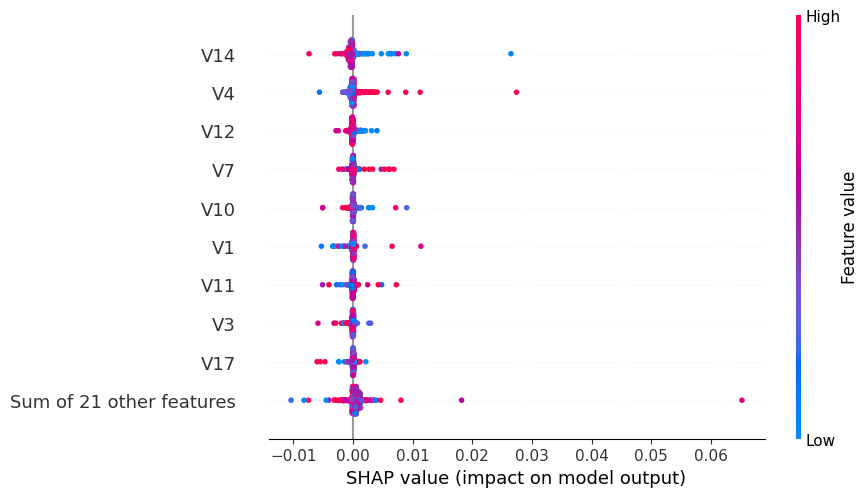

In [ ]:
# A: Use shap.Explainer on the pipeline (predicts prob for class 1)
import shap
import numpy as np
import pandas as pd

# sample background to speed up explainer (use raw X_train)
bg_size = 100
bg = X_train.sample(min(bg_size, len(X_train)), random_state=SEED)

# Explain the probability of class 1 (fraud)
model_fn = lambda x: best_pipeline.predict_proba(x)[:, 1]

explainer = shap.Explainer(model_fn, bg)   # SHAP will handle preprocessing inside pipeline
# choose a test sample to explain (don't do whole test set if it's large)
sample_size = min(500, len(X_test))
X_sample = X_test.sample(sample_size, random_state=SEED)

# compute explanations (this returns an Explanation object)
shap_values = explainer(X_sample)

# beeswarm / summary plot (fast-ish for <= 500 rows)
shap.plots.beeswarm(shap_values)   # shows impact on predicted probability for class 1

# If you prefer the classic summary_plot:
# shap.summary_plot(shap_values.values, X_sample)   # values shape = (n_samples, n_features)


In [ ]:
# Save final pipeline already done; save the threshold and a small helper
import json
meta = {'threshold': float(threshold)}
with open('model_metadata.json','w') as f:
    json.dump(meta, f)
print("Saved threshold to model_metadata.json")

# Helper predict function for new transactions
def predict_transaction(df_new):
    """
    df_new: DataFrame with same columns as original X (raw Amount, Time, V1..V28)
    returns: DataFrame with probability and label (0/1) using saved threshold
    """
    proba = final_pipeline.predict_proba(df_new)[:,1]
    label = (proba >= threshold).astype(int)
    out = df_new.copy()
    out['fraud_proba'] = proba
    out['predicted_label'] = label
    return out

# usage example:
# new_preds = predict_transaction(X_test.sample(5))
# print(new_preds[['fraud_proba','predicted_label']])


Saved threshold to model_metadata.json


In [ ]:
# Save this as app.py and run via `flask run` or use in production with a WSGI server
from flask import Flask, request, jsonify
import joblib
app = Flask(__name__)
pipeline = joblib.load('final_fraud_pipeline.joblib')
with open('model_metadata.json','r') as f:
    import json
    meta = json.load(f)
threshold = meta['threshold']

@app.route('/predict', methods=['POST'])
def predict():
    payload = request.get_json()
    # payload expected as list-of-dicts or dict of lists compatible with pandas.DataFrame
    import pandas as pd
    df_new = pd.DataFrame(payload)
    probs = pipeline.predict_proba(df_new)[:,1].tolist()
    labels = [1 if p >= threshold else 0 for p in probs]
    return jsonify({'probabilities': probs, 'labels': labels})

# if __name__ == '__main__':
#     app.run(host='0.0.0.0', port=5000)
